# Homework #4: Newton-Raphson Method (Lecture 5)

## Homework: use Newton-Raphson method to solve the following equation arrays
Hint: first you need to derive the partical derivative of the equation arrays. You can do it either analytically by hand or numerically using method we learned in the last lecture.
\
Find the solution for:
\
\begin{align}
x_{1}^2+x_{1}x_{2}=10\\
x_{2}+3x_{1}x_{2}^2=57
\end{align}
\
First turn the two equations inot functions and set them equal to zero:

\begin{align}
f_1(x_1, x_2)=x_1{^2}+x_1x_2-10=0\\
f_2(x_1, x_2)=x_2+3x_{1}x_2{^2}-57=0\\
\end{align}
\
Now solve for all of the first partial derivatives:
\
\begin{align}
\frac{\partial f_1}{\partial x_1}=2x_1+x_2
\end{align}
\begin{align}
\frac{\partial f_1}{\partial x_2}={x_1}
\end{align}
\begin{align}
\frac{\partial f_2}{\partial x_1}=3x_2{^2}
\end{align}
\begin{align}
\frac{\partial f_2}{\partial x_2}=1+6x_1x_2
\end{align}
\
From Lect5, using Equation 9:  
$
\left[ \begin{array}{c} f_{1}\\ f_{2} \end{array}\right] + \begin{bmatrix} \partial f_{1}/\partial x_{1} & \partial f_{1}/\partial x_{2}  \\ \partial f_{2}/\partial x_{1} & \partial f_{2}/\partial x_{2} \end{bmatrix}\left[ \begin{array}{c} \Delta x_{1} \\ \Delta x_{2}  \end{array}\right] =0 
$
\
\
Equation 10: 
$
F'\Delta {\bf{x}}=-\bf{f}
$
\
\
Equation 11: 
$
\begin{bmatrix} a & b \\c & d \end{bmatrix}\left[ \begin{array}{c} \Delta x_{1} \\ \Delta x_{2}  \end{array}\right] =-\left[ \begin{array}{c} f_{1}\\ f_{2} \end{array}\right]
$
\
gives:
\
\begin{align}
a=\frac{\partial f_1}{\partial x_1}=2x_1+x_2\\
b=\frac{\partial f_1}{\partial x_2}={x_1}\\
c=\frac{\partial f_2}{\partial x_1}=3x_2{^2}\\
d=\frac{\partial f_2}{\partial x_2}=1+6x_1x_2
\end{align}
\
Which gives the Jacobian: 
\
\begin{align}
\bf{J} = \begin{bmatrix} a & b \\c & d \end{bmatrix}
\end{align}
\
Finding the inverse of the Jacobian:
\
\begin{align}
\bf{J^{-1}} = \frac{1}{ad-bc}\begin{bmatrix} d & -b \\-c & a \end{bmatrix}
\end{align}
\
And finally the final $x_1, x_2$ iterative expression:
\
\begin{align}
\begin{bmatrix} x_1 \\ x_2 \end{bmatrix}= \begin{bmatrix} x_1 \\ x_2 \end{bmatrix} - J^{-1}\begin{bmatrix} f_1(x_1, x_2) \\ f_2(x_1, x_2) \end{bmatrix}
\end{align}


In [1]:
def f1(x1, x2):
    return x1*x1+x1*x2-10.

def f2(x1, x2):
    return x2 + 3.*x1*x2*x2-57.

def A(x1, x2):
    return 2.*x1+1.*x2

def B(x1, x2):
    return x1

def C(x1, x2):
    return 3.*x2*x2

def D(x1, x2):
    return 1.+6.*x1*x2

def det_F(x1, x2):
    return A(x1, x2)*D(x1, x2)-B(x1, x1)*C(x1, x2)

def delx_1(x1, x2):
    Bf2 = B(x1, x2)*f2(x1, x2)
    Df1 = D(x1,x2)*f1(x1, x2)
    return (Bf2-Df1)/det_F(x1, x2)

def delx_2(x1, x2):
    Cf1 = C(x1, x2)*f1(x1, x2)
    Af2 = A(x1, x2)*f1(x1, x2)
    return (Cf1-Af2)/det_F(x1, x2)

def Jac_inv(x1, x2):
    return [[D(x1,x2)/det_F(x1,x2),-B(x1,x2)/det_F(x1,x2)],[-C(x1,x2)/det_F(x1,x2),A(x1,x2)/det_F(x1,x2)]]


In [2]:
def newt_raph(x1, x2, Nmax, eps, f1, f2, back_tracking=False, disp=False):
    if disp:
        if back_tracking: print("Backtracking is on.")

    for i in range(0,Nmax):
        a = Jac_inv(x1,x2)[0][0]
        b = Jac_inv(x1,x2)[0][1]
        c = Jac_inv(x1,x2)[1][0]
        d = Jac_inv(x1,x2)[1][1]
        
        dx1t = -(a*f1(x1,x2) + b*f2(x1,x2))
        dx2t = -(c*f1(x1,x2) + d*f2(x1,x2))
        
        if back_tracking:
            
            while (abs(f1(x1+dx1t, x2))>abs(f1(x1, x2))):
                dx1t=dx1t/2.
        
            while (abs(f2(x1, x2+dx2t))>abs(f2(x1, x2))):
                dx2t=dx2t/2.
        
        x1 = x1 + dx1t
        x2 = x2 + dx2t

        if disp: print(f"x1: {x1}, x2: {x2}")
        
        if(abs(f1(x1,x2))<eps and abs(f2(x1,x2))<eps):
            prec = 0
            if abs(f1(x1,x2)) < abs(f2(x1,x2)):
                precise = abs(f1(x1,x2))
            else:
                precise = abs(f2(x1,x2))
            
            print(f"\nRoot is at ({x1}, {x2}) after {i} iterations, with a precision of {precise}")
            
            break
    
    return x1, x2

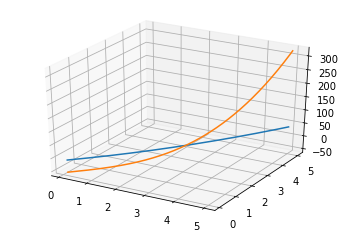

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

COLOR = '#e8f0ff' # A very light grey, close to white

plt.rcParams['axes.facecolor']= COLOR 

plt.rcParams["figure.figsize"] = (10, 10)


x = np.linspace(0.1, 5, 300)
y = np.linspace(0.1, 5, 300)

ax.plot(x, y, f1(x,y))
ax.plot(x, y, f2(x,y))

plt.show()


In [4]:
x= [0.0000001, 2000.]
eps = 1.e-8
nmax=100


print(x, '\n')
root = newt_raph(x[0], x[1], nmax, eps, f1, f2, disp=True)
print('\nRoot:',root)

[1e-07, 2000.0] 

x1: 0.005003095292323702, x2: -59905.85648010828
x1: -0.0003396197657884086, x2: -61973.61332130589
x1: -0.0003255019989782392, x2: -32020.89516273005
x1: -0.0006250193452928617, x2: -1257.092597238341
x1: -0.013734774362906264, x2: 10367.987505352814
x1: 0.001963373037878408, x2: 11121.984933664444
x1: 0.0018140897317352172, x2: 5938.924080232918
x1: 0.003370997771536383, x2: 415.4328194848604
x1: 0.04407254081598772, x2: -2049.5541753027337
x1: -0.009946826677359459, x2: -2285.15985636037
x1: -0.008836155779576796, x2: -1260.5008724762422
x1: -0.0159042355317784, x2: -123.41071681671724
x1: -0.15360262236104877, x2: 440.0142043283838
x1: 0.046400862620734756, x2: 507.5859041647555
x1: 0.03969609521640583, x2: 288.8246864850846
x1: 0.0691414357477034, x2: 37.5741048184189
x1: 0.4947572498895887, x2: -87.58523832383237
x1: -0.24677426772200395, x2: -110.07063212190596
x1: -0.18459541303394356, x2: -68.13456175475
x1: -0.2963180816963162, x2: -12.52741031731776
x1: -1.

In [5]:
x= [1., 1.]
eps = 1.e-8
nmax=100


print(x, '\n')
root = newt_raph(x[0], x[1], nmax, eps, f1, f2, disp=True)
print('\nRoot:',root)

print('\n', x, '\n')
root = newt_raph(x[0], x[1], nmax, eps, f1, f2, back_tracking=True, disp=True)
print('\nRoot:',root)

[1.0, 1.0] 

x1: 1.166666666666667, x2: 8.5
x1: 1.5669530414380843, x2: 3.687816996170171
x1: 2.010834233198522, x2: 2.8824243460391097
x1: 1.9991677250643758, x2: 3.0022824566444895
x1: 1.9999998110162422, x2: 3.000000058050752
x1: 2.000000000000006, x2: 2.9999999999999907

Root is at (2.000000000000006, 2.9999999999999907) after 5 iterations, with a precision of 2.4868995751603507e-14

Root: (2.000000000000006, 2.9999999999999907)

 [1.0, 1.0] 

Backtracking is on.
x1: 1.166666666666667, x2: 4.75
x1: 1.5860493984340187, x2: 3.531128652364887
x1: 2.01752390014164, x2: 3.2132416768281837
x1: 1.9976423548542463, x2: 3.010474625567604
x1: 1.9976423548542463, x2: 3.000009768219766
x1: 2.000001003966825, x2: 3.000009768219766
x1: 1.9999999999946443, x2: 3.0000000000241522

Root is at (1.9999999999946443, 3.0000000000241522) after 6 iterations, with a precision of 1.0814460438268725e-11

Root: (1.9999999999946443, 3.0000000000241522)


In [6]:
x= [1.5, 2.0]
eps = 1.e-8
nmax=100


print(x, '\n')
root = newt_raph(x[0], x[1], nmax, eps, f1, f2, disp=True)
print('\nRoot:',root)

print('\n', x, '\n')
root = newt_raph(x[0], x[1], nmax, eps, f1, f2, back_tracking=True, disp=True)
print('\nRoot:',root)

[1.5, 2.0] 

x1: 1.9512987012987013, x2: 3.662337662337662
x1: 1.980015953553167, x2: 3.0621602042705085
x1: 1.9998441936657885, x2: 3.0001268937826757
x1: 2.0000000033426364, x2: 2.9999999905527246
x1: 2.0, x2: 3.0

Root is at (2.0, 3.0) after 4 iterations, with a precision of 0.0

Root: (2.0, 3.0)

 [1.5, 2.0] 

Backtracking is on.
x1: 1.9512987012987013, x2: 3.662337662337662
x1: 1.9512987012987013, x2: 3.0621602042705085
x1: 2.000193981026281, x2: 3.030565958143009
x1: 1.9999460353900647, x2: 3.0001926760774213
x1: 1.9999460353900649, x2: 3.0000000022006845
x1: 2.000000000525622, x2: 3.0000000022006845
x1: 1.9999999999999998, x2: 3.0

Root is at (1.9999999999999998, 3.0) after 6 iterations, with a precision of 1.7763568394002505e-15

Root: (1.9999999999999998, 3.0)


In [7]:
x= [0.0000001, 1000.] # Curious number that breaks the algorithm with backtracking on
eps = 1.e-8
nmax=100

print(x, '\n')
root = newt_raph(x[0], x[1], nmax, eps, f1, f2, disp=True) # No back tracking
print('\nRoot:',root)

[1e-07, 1000.0] 

x1: 0.010003093369987195, x2: -29933.71987803476
x1: -0.0006796920820944484, x2: -30967.959822235447
x1: -0.0006514102257623502, x2: -16001.114701147795
x1: -0.0012508044472676859, x2: -627.9040289410859
x1: -0.027513030032649332, x2: 5188.840294361944
x1: 0.003922995064810229, x2: 5565.200950414687
x1: 0.003625124923340547, x2: 2971.6311004757986
x1: 0.00673600257689181, x2: 208.42964994008526
x1: 0.08767940578589753, x2: -1020.2105716324052
x1: -0.020008723824406785, x2: -1138.846357231857
x1: -0.01773740756912703, x2: -629.0441557968916
x1: -0.031891718302234466, x2: -61.76194647116222
x1: -0.30870434312246187, x2: 223.10367824843985
x1: 0.09234891769110642, x2: 256.9582969364312
x1: 0.07824425070389475, x2: 147.46667667837247
x1: 0.13486724997375646, x2: 20.89625050190466
x1: 0.8624096868770266, x2: -40.16795392413823
x1: -0.6104936690818503, x2: -54.923748053415586
x1: -0.3716566317699165, x2: -37.73460874089697
x1: -0.5320456845869995, x2: -9.929686619139574
x1:

In [8]:
# Same pair of numbers with backtracking 
x= [0.0000001, 1000.]
eps = 1.e-8
nmax=1000

print(x, '\n')
root = newt_raph(x[0], x[1], nmax, eps, f1, f2, back_tracking=True, disp=True)
print('\nRoot:',root)

[1e-07, 1000.0] 

Backtracking is on.
x1: 0.010003093369987195, x2: 33.321253811413726
x1: 0.4462075022871159, x2: 29.51225997647498
x1: 0.4462075022871159, x2: 9.135509971163707
x1: 1.0529659623382592, x2: -5.307301545879874
x1: -2.5983626878402353, x2: -5.307301545879874
x1: -2.3705434670072085, x2: -2.171186723747153
x1: -2.3705434670072085, x2: 1.2000043295102238
x1: -2.3705434670072085, x2: -0.7740318002208884
x1: -3.0871102676846456, x2: 0.6246091114317602
x1: -3.0871102676846456, x2: -0.04931748530047697
x1: -3.1452117907486237, x2: 0.06741200139214332
x1: -3.1452117907486237, x2: 0.0424869542993207
x1: -3.2168678948166125, x2: 0.060275302816731276
x1: -3.175291830363062, x2: 0.04998012861089353
x1: -3.1952004838373056, x2: 0.054918029320127265
x1: -3.1875630433757802, x2: 0.05113216691917428
x1: -3.1883185651903503, x2: 0.05263109074858819
x1: -3.1883185651903503, x2: 0.052014646690932295
x1: -3.1884411593421427, x2: 0.05250102326291657
x1: -3.1884411593421427, x2: 0.0521037203

x1: -3.1884335913171835, x2: 0.05210372030351423
x1: -3.1884335913171835, x2: 0.05210372030351423
x1: -3.1884335913171835, x2: 0.05210372030351423
x1: -3.1884335913171835, x2: 0.05210372030351423
x1: -3.1884335913171835, x2: 0.05210372030351423
x1: -3.1884335913171835, x2: 0.05210372030351423
x1: -3.1884335913171835, x2: 0.05210372030351423
x1: -3.1884335913171835, x2: 0.05210372030351423
x1: -3.1884335913171835, x2: 0.05210372030351423
x1: -3.1884335913171835, x2: 0.05210372030351423
x1: -3.1884335913171835, x2: 0.05210372030351423
x1: -3.1884335913171835, x2: 0.05210372030351423
x1: -3.1884335913171835, x2: 0.05210372030351423
x1: -3.1884335913171835, x2: 0.05210372030351423
x1: -3.1884335913171835, x2: 0.05210372030351423
x1: -3.1884335913171835, x2: 0.05210372030351423
x1: -3.1884335913171835, x2: 0.05210372030351423
x1: -3.1884335913171835, x2: 0.05210372030351423
x1: -3.1884335913171835, x2: 0.05210372030351423
x1: -3.1884335913171835, x2: 0.05210372030351423
x1: -3.1884335913171

x1: -3.1884335913171835, x2: 0.05210372030351423
x1: -3.1884335913171835, x2: 0.05210372030351423
x1: -3.1884335913171835, x2: 0.05210372030351423
x1: -3.1884335913171835, x2: 0.05210372030351423
x1: -3.1884335913171835, x2: 0.05210372030351423
x1: -3.1884335913171835, x2: 0.05210372030351423
x1: -3.1884335913171835, x2: 0.05210372030351423
x1: -3.1884335913171835, x2: 0.05210372030351423
x1: -3.1884335913171835, x2: 0.05210372030351423
x1: -3.1884335913171835, x2: 0.05210372030351423
x1: -3.1884335913171835, x2: 0.05210372030351423
x1: -3.1884335913171835, x2: 0.05210372030351423
x1: -3.1884335913171835, x2: 0.05210372030351423
x1: -3.1884335913171835, x2: 0.05210372030351423
x1: -3.1884335913171835, x2: 0.05210372030351423
x1: -3.1884335913171835, x2: 0.05210372030351423
x1: -3.1884335913171835, x2: 0.05210372030351423
x1: -3.1884335913171835, x2: 0.05210372030351423
x1: -3.1884335913171835, x2: 0.05210372030351423
x1: -3.1884335913171835, x2: 0.05210372030351423
x1: -3.1884335913171

In [9]:
x= [0.0000001, 2000.]
eps = 1.e-8
nmax=1000

print(x, '\n')
root = newt_raph(x[0], x[1], nmax, eps, f1, f2, back_tracking=True, disp=True)
print('\nRoot:',root)

[1e-07, 2000.0] 

Backtracking is on.
x1: 0.005003095292323702, x2: -1869.1160300067677
x1: -0.011088718810923954, x2: -1869.1160300067677
x1: -0.010796305840322417, x2: -951.0961073004257
x1: -0.010796305840322417, x2: -22.310088663588772
x1: -0.657635270281902, x2: 31.94440310884135
x1: 0.7089662882565048, x2: 31.94440310884135
x1: 0.5925042170039114, x2: 18.87651604812915
x1: 0.5925042170039114, x2: 4.823551338815388
x1: 2.318581254430232, x2: 4.823551338815388
x1: 1.9196469710879938, x2: 3.6222082143060823
x1: 1.9196469710879938, x2: 3.0449769033578518
x1: 2.0010567172727045, x2: 3.0449769033578518
x1: 1.9998842298141344, x2: 3.000432015481028
x1: 1.9998842298141346, x2: 3.000000012315487
x1: 2.0000000024191236, x2: 3.000000012315487
x1: 2.0, x2: 3.0

Root is at (2.0, 3.0) after 15 iterations, with a precision of 0.0

Root: (2.0, 3.0)


In [10]:
x= [2000., 0.0000001]
eps = 1.e-8
nmax=1000

print(x, '\n')
root = newt_raph(x[0], x[1], nmax, eps, f1, f2, back_tracking=True, disp=True)
print('\nRoot:',root)

print(x, '\n')
root = newt_raph(x[0], x[1], nmax, eps, f1, f2, disp=True)
print('\nRoot:',root)

[2000.0, 1e-07] 

Backtracking is on.
x1: 971.5366590348551, x2: 0.11119479117522031
x1: 485.7157407817334, x2: 0.14113432472273033
x1: 242.78153335584204, x2: 0.19249295599398508
x1: 121.28629855436334, x2: 0.2694739021996448
x1: 60.50668273912774, x2: 0.3799483373449166
x1: 30.084645861873422, x2: 0.5368219180178262
x1: 14.853214747632746, x2: 0.7596095532879058
x1: 7.259722811936468, x2: 1.0774865189686715
x1: 3.598934660009896, x2: 1.9826499525712902
x1: 2.2446899296222904, x2: 2.3084285160428397
x1: 2.210887583933583, x2: 3.029203267291746
x1: 2.0074246227860697, x2: 2.997879347297981
x1: 2.0000095857541322, x2: 2.997879347297981
x1: 2.0000095857541322, x2: 3.0000009120686078
x1: 2.0000000000165783, x2: 2.99999999999229

Root is at (2.0000000000165783, 2.99999999999229) after 14 iterations, with a precision of 1.0062706223834539e-10

Root: (2.0000000000165783, 2.99999999999229)
[2000.0, 1e-07] 

x1: 971.5366590348551, x2: 56.9316819817128
x1: 478.759670709759, x2: 42.9041563426688